## To Predict Prices of Diamonds

**Context**


This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization. To Learn more - https://www.kaggle.com/datasets/shivam2503/diamonds

### Import Libraries

The import libraries section in a machine learning (ML) project typically involves importing all the necessary libraries and modules used throughout the project for tasks such as data manipulation, preprocessing, model building, evaluation, and visualization.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

### Read Data into Notebook

In this section of this machine learning (ML) project, my primary focus is to use the Pandas library to import, load, and organize the dataset into a format that is suitable for analysis and modeling.

In [3]:
# Read the CSV and set the first column as the index (Unnamed: 0)
df = pd.read_csv('Data/diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Data Visualization

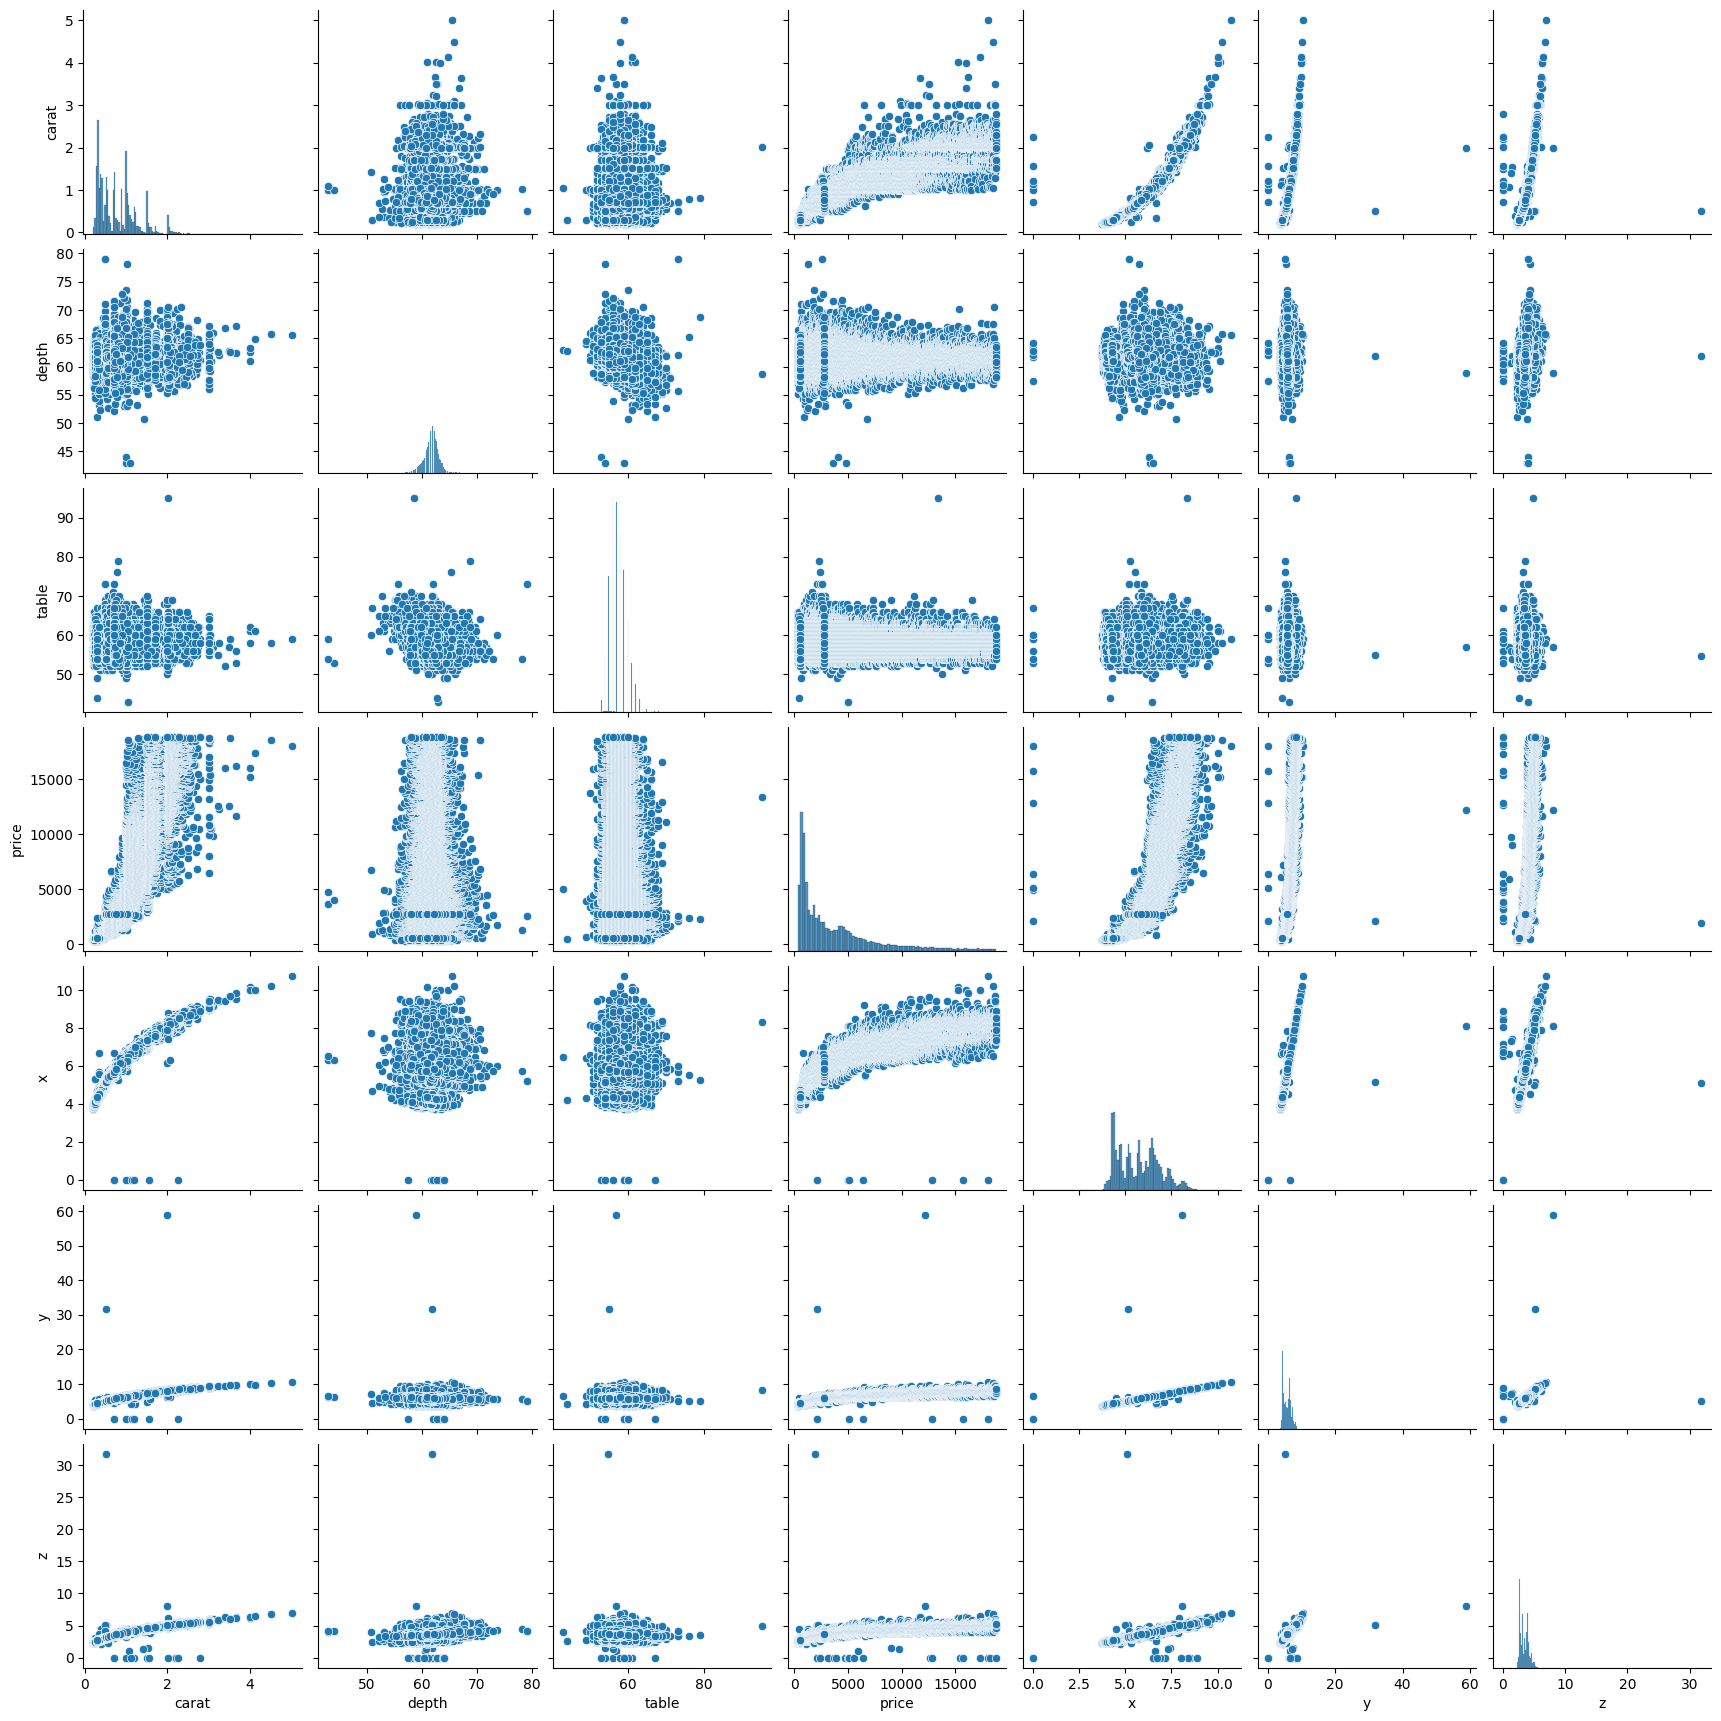

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

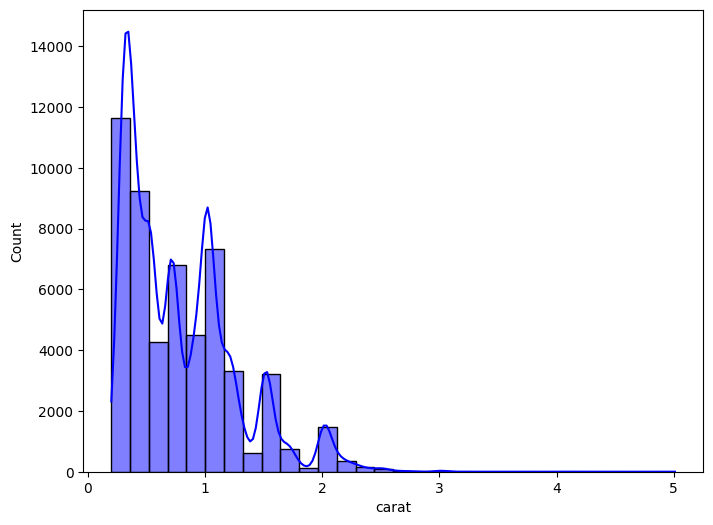

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['carat'], kde=True, color='blue', bins=30)
plt.show();

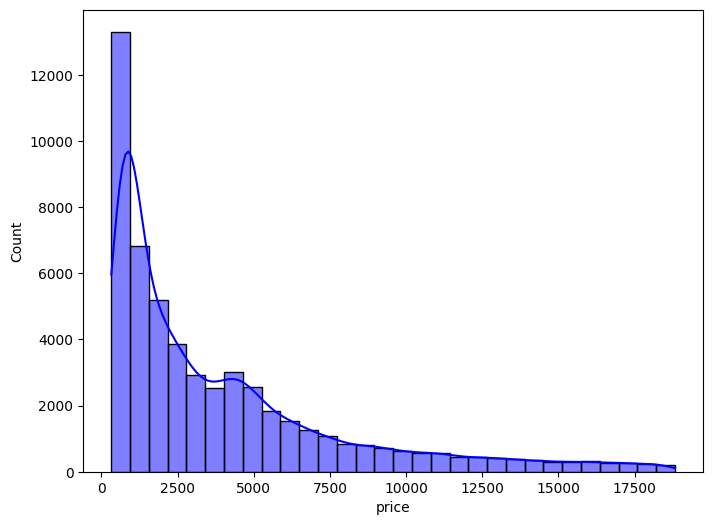

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='blue', bins=30)
plt.show();

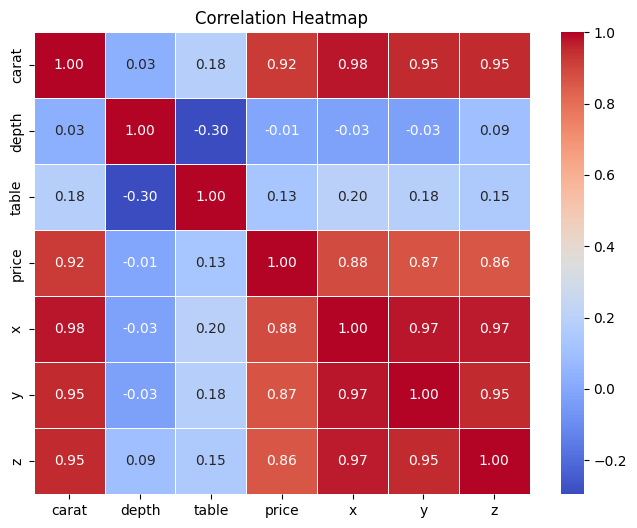

In [11]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()
 
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
 
#Save the image below
plt.savefig("Correlation Heatmap.png",dpi = 300,bbox_inches ="tight")

plt.show();

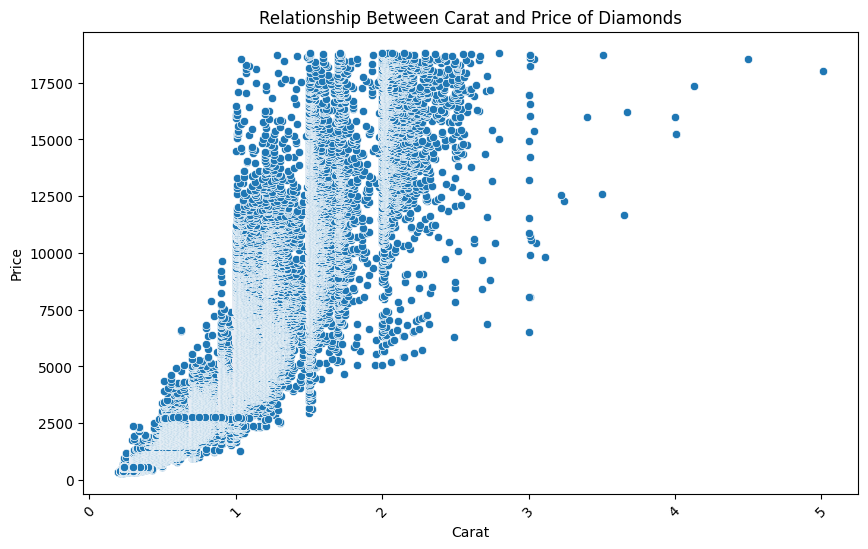

In [12]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', palette='viridis')

# Adding labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Relationship Between Carat and Price of Diamonds')
plt.xticks(rotation=45)
plt.show();

### Preprocessing

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [14]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [15]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [16]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [17]:
#Cut - (Fair, Good, Very Good, Premium, Ideal)

# Mapping for label encoding
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

# Apply the mapping to the 'cut' column
df['cut'] = df['cut'].map(cut_mapping)

In [18]:
#Color- J (worst) to D (best)

# Mapping for label encoding
color_mapping = {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}

# Apply the mapping to the 'color' column
df['color'] = df['color'].map(color_mapping)

In [19]:
#Clarity - (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

# Mapping for label encoding
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Apply the mapping to the 'color' column
df['clarity'] = df['clarity'].map(clarity_mapping)

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


### Define function to evaluate model

In [21]:
def evaluate_preds(y_true,y_preds):
    '''
    Perform evaluation comparison on y_true labels vs y_pred labels on a Regression
    '''
    r2 = r2_score(y_true,y_preds) 
    mae = mean_absolute_error(y_true,y_preds)
    mse = mean_squared_error(y_true,y_preds)
    metric_dict = {'R Squared':round(r2,2),
                  "Mean Absolute Error":round(mae,2),
                  "Mean Squared Error":round(mse,2)}
    #print(f"R Squared:{r2 * 100:.2f}%")
    #print(f"Mean absolute Error:{mae:.2f}")
    #print(f"Mean Squared Error:{mse:.2f}")
          
    return metric_dict 

### Define X and y and split into test and train

In [22]:
X = df.drop('price', axis = 1)
y = df['price']

np.random.seed(42)
 
#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Scale X

In [23]:
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Convert the scaled data back to a DataFrame
scaled_df_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_df_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

In [24]:
scaled_df_X_train

,carat,cut,color,clarity,depth,table,x,y,z
0,2.560056,-1.708965,0.347949,-1.246901,-2.550748,2.933861,2.229450,2.138209,1.738207
1,0.447392,-0.812192,0.936621,-1.246901,-1.220426,1.139575,0.747550,0.656710,0.537733
2,0.637532,0.084582,-0.829396,-0.032134,0.529996,0.242432,0.765404,0.700284,0.791951
3,1.482597,-1.708965,0.936621,-1.246901,-0.170173,3.382432,1.318885,1.249310,1.243894
4,1.524851,-0.812192,-0.240724,0.575249,0.249928,-0.206140,1.372448,1.380030,1.399249
...,...,...,...,...,...,...,...,...,...
43147,0.531899,-0.812192,-1.418069,-0.032134,0.459979,0.691003,0.667206,0.674140,0.721335
43148,-0.693447,0.981355,1.525294,0.575249,-0.520257,-1.103283,-0.627225,-0.633065,-0.676864
43149,-0.989219,-0.812192,0.347949,2.397399,-1.010376,0.242432,-1.109289,-1.112374,-1.185299
43150,0.214999,0.084582,-2.006742,-0.639517,0.740047,0.691003,0.354757,0.255834,0.396501


In [25]:
scaled_df_X_test

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.179359,0.981355,-0.240724,1.790016,0.249928,-0.654711,-1.573499,-1.513250,-1.510133
1,-0.461053,-0.812192,0.347949,1.182632,-1.220426,-0.206140,-0.261214,-0.275763,-0.394399
2,-0.841333,0.981355,0.936621,1.182632,0.249928,-1.103283,-0.868257,-0.868362,-0.832219
3,-0.777953,0.084582,0.936621,1.182632,-0.660291,-0.206140,-0.725423,-0.737642,-0.789849
4,1.588231,0.981355,0.936621,-1.246901,0.389962,-1.103283,1.524209,1.423604,1.512235
...,...,...,...,...,...,...,...,...,...
10783,-0.630067,-0.812192,0.936621,0.575249,-0.100156,0.691003,-0.600444,-0.519774,-0.563878
10784,-1.158233,-0.812192,0.347949,1.182632,-0.100156,-0.206140,-1.502082,-1.452247,-1.467764
10785,-1.031473,-1.708965,-0.240724,1.790016,-2.620765,2.036718,-1.171779,-1.103659,-1.354778
10786,0.912178,0.981355,0.347949,0.575249,0.529996,-1.551854,0.997509,0.944295,1.032046


### Modeling

#### Linear Regression

In [26]:
#Define model
Lr_model = LinearRegression()
 
#Fit model
Lr_model.fit(scaled_df_X_train, y_train)

LinearRegression()

In [27]:
# To predict y using the trained model
y_preds = Lr_model.predict(scaled_df_X_test)

# To compare the true value of y to the predicted values
lr_baseline = evaluate_preds(y_test,y_preds)

lr_baseline

{'R Squared': 0.91,
 'Mean Absolute Error': 805.27,
 'Mean Squared Error': 1499636.69}

#### Lasso

In [28]:
# Initialize the Lasso regression model
model_lasso = Lasso(alpha=1.0)  # alpha is the regularization strength

# Train the model
model_lasso.fit(scaled_df_X_train, y_train)

Lasso()

In [29]:
# Make predictions
y_pred2 = model_lasso.predict(scaled_df_X_test)

Las_Nor = evaluate_preds(y_test,y_pred2)
Las_Nor

{'R Squared': 0.91,
 'Mean Absolute Error': 806.53,
 'Mean Squared Error': 1499715.34}

#### Random Forest

In [30]:
np.random.seed(42)

# Initialize the Random Forest regression model
model_rf = RandomForestRegressor()

# Train the model
model_rf.fit(scaled_df_X_train, y_train)

RandomForestRegressor()

In [31]:
# Make predictions
y_pred3 = model_rf.predict(scaled_df_X_test)

Rf_Nor = evaluate_preds(y_test,y_pred3)
Rf_Nor

{'R Squared': 0.98,
 'Mean Absolute Error': 266.41,
 'Mean Squared Error': 293247.19}

In [32]:
# # Make predictions
# y_pred4 = model_rf.predict(scaled_df_X_train)

# Rf_Nor = evaluate_preds(y_train,y_pred4)
# Rf_Nor

## Ensemble

In [33]:
np.random.seed(42)

def ensemble(scaled_df_X_test, lrg, la, rf):
    lr = Lr_model.predict(scaled_df_X_test)
    lasso = model_lasso.predict(scaled_df_X_test)
    random_f = model_rf.predict(scaled_df_X_test)
    # Take the average of the predictions from the three models
    return ((lrg * lr) + (la * lasso) + (rf * random_f))

y_ens = ensemble(scaled_df_X_test, .30, .30, .40).flatten()

In [34]:
Ens_Nor = evaluate_preds(y_test,y_ens)
Ens_Nor 

{'R Squared': 0.96,
 'Mean Absolute Error': 539.31,
 'Mean Squared Error': 708624.14}

### Hyperparameter

#### Random Forest

In [35]:
np.random.seed(42)

grid_2 = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

#Define model
Rf_model_2 = RandomForestRegressor(n_jobs = -1)

# Setup GridSearchCV
gs_Rf_model_2 = GridSearchCV(estimator = Rf_model_2,
                    param_grid = grid_2,
                    cv = 5,
                    verbose = 2)
#Fit GridSearch model
gs_Rf_model_2.fit(scaled_df_X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estima

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [36]:
# To see the best parameter combination
gs_Rf_model_2.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [37]:
# Make predictions
y_pred10 = gs_Rf_model_2.predict(scaled_df_X_test)

In [38]:
Rf_Gs = evaluate_preds(y_test,y_pred10)
Rf_Gs

{'R Squared': 0.98,
 'Mean Absolute Error': 266.04,
 'Mean Squared Error': 289821.42}

### Compare the outcomes of our models

In [39]:
compare_matrics = pd.DataFrame({'baseline_LR': lr_baseline,
                                'baseline_RF': Rf_Nor,
                                'baseline_LA': Las_Nor,
                                'GridS_RF': Rf_Gs
                               })
compare_matrics

,baseline_LR,baseline_RF,baseline_LA,GridS_RF
R Squared,0.91,0.98,0.91,0.98
Mean Absolute Error,805.27,266.41,806.53,266.04
Mean Squared Error,1499636.69,293247.19,1499715.34,289821.42


### Conclusion


GridS_RF is performing the best among the models evaluated, as it achieves the highest R Squared (0.98), lowest Mean Absolute Error (266.04), and lowest Mean Squared Error (289821.42) compared to the other models listed.

### Save

In [40]:
#save an existing model to file
pickle.dump(gs_Rf_model_2, open('grid_search_random_forest_regression_model_2.pkl', 'wb'))